In [145]:
# Functions used in this notebook =======================================

In [146]:
import matplotlib.pyplot as plt
import numpy as np

def median(lst):
    return np.median(np.array(lst))

def iqr_subset(l):
    """ Splits the set in on the median depending on whether the size is even or odd.
        NOTE: In all cases the median is omitted """

    S = sorted(l)
    if (len(S) % 2 == 0):
        # Split the dataset into two buckets (each containing 2 quartiles)
        Su = S[len(S) / 2:]
        St = S[:len(S) / 2]
    else:
        s_median = median(l)

        # Split by the median and omit it
        Su = S[S.index(s_median) + 1:]
        St = S[:S.index(s_median)]
    return (Su, St)

def iqr(*l):
    """ implementation of Interquartile Range
    """
    # Get our pairs of quartiles
    Su, St = iqr_subset(l)
        
    # Find the median of each bucket (median(q1, q2), median(q3, q4))
    su_median, st_median = median(Su), median(St)
    return (su_median - st_median)

def draw_box_and_whisker(d):
    plt.boxplot(d, 0, 'rs', 0)

    # Add some space around the graph
    plt.xticks(range(min(d) -1, max(d) + 2))
    plt.yticks([])
    plt.xlabel("x100 tickets sold daily")
    plt.figure()
    plt.show()
    
# =======================================================================

## How to understand and draw "Box and Whisker" plots

Let's say we have the dataset _S_, representing the number of tickets sold daily for a popular vampire movie during the month of December. The box plot below shows the data for the number of tickets sold, in hundreds.

```
S = 5,2,10,6,2,8,8,1,2,5,7,3,3,4
```
This can be represented by the following:

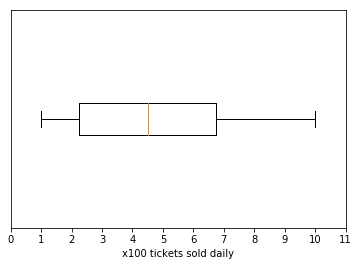

In [147]:
S = [5,2,10,6,2,8,8,1,2,5,7,3,3,4]
draw_box_and_whisker(S)

Let's see what tools we can apply to figure out what this means from the opposite end:

In [153]:
# Get quartile subsets of S
Su, St = iqr_subset(S)

# Grab their median x100 tickets:
Su_med, St_med = median(Su) * 100, median(St) * 100
print (
    "Interquartile Range of S: %s tickets\n"
    "Median of S: %s tickets\n"
    "Median of left-most S: %s\n"
    "Median of right-most S: %s\n"
    "Maximum tickets sold daily: %s\n"
    "Minimum tickets sold daily: %s\n\n"
    "Where S is the dataset representing number of tickets sold \n"
    "daily for a popular vampire movie during the month of December"
    # Expand to x100
) % (
        iqr(*S) * 100,    # IGR range 
        median(S) * 100,  # Median of S
        St_med,           # Median of left-most S
        Su_med,           # Median of right-most S
        max(S) * 100,     # Max of S
        min(S) * 100      # Min of S
    )

Interquartile Range of S: 500.0 tickets
Median of S: 450.0 tickets
Median of left-most S: 200.0
Median of right-most S: 700.0
Maximum tickets sold daily: 1000
Minimum tickets sold daily: 100

Where S is the dataset representing number of tickets sold 
daily for a popular vampire movie during the month of December


Here we can see a couple of things about how _S_ correlates to the plot:
   - The red line correlates to `median(S)`
   - The left-most whisker correlates to `min(S)`
   - the right-most whisker correlates to `max(S)`
    